In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
pd.options.display.max_columns = None
os.getcwd()
os.chdir("C:/code/Uni/ba/blood-exams")
data = pd.read_excel('covid_study_v2.xlsx')

In [3]:
data.insert(0,'male',(data["GENDER"] == "M").astype('int64'))
data.insert(0,'female',(data["GENDER"] == "F").astype('int64'))
data.drop(columns="GENDER", inplace=True)
data['Lymphocytes'] = pd.to_numeric(data['Lymphocytes'], errors='coerce')
data.loc[data["AGE"] < 18, "AGE"] = np.NaN
data.head()

,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,0,1,56.0,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,0,1,56.0,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,0,1,72.0,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,0,1,72.0,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,0,1,77.0,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [19]:
for val in data.SWAB.unique():
    anteil = (data[data['SWAB'] == val].shape[0]/data.shape[0])*100
    print(f"SWAB = {val}: {data[data['SWAB'] == val].shape[0]} ({anteil :04.2f} %)")

SWAB = 1: 177 (63.44 %)
SWAB = 0: 102 (36.56 %)


In [4]:
summary = data.describe()
summary = summary.append(pd.Series((data.isnull().sum(axis=0)/data.shape[0])*100, name="NaNs in %"))
summary = summary.append(pd.Series(data.isnull().sum(axis=0), name="NaNs"))
for val in data.SWAB.unique():
    total = data[data['SWAB'] == val].shape[0]
    summary = summary.append(pd.Series((data[data['SWAB'] == val].isnull().sum(axis=0)/total)*100,name=f"NaNs for SWAB = {val} in %"))

In [5]:
print("Anzahl an Datensätzen: ", data.shape[0])
summary

Anzahl an Datensätzen:  279


,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
count,279.000000,279.000000,277.000000,277.000000,277.000000,209.000000,208.000000,209.000000,209.000000,208.000000,273.000000,277.000000,266.000000,131.000000,136.000000,194.000000,279.000000
mean,0.326165,0.673835,61.776173,8.553069,226.532130,6.200478,1.186538,0.605742,0.055024,0.014423,90.889011,54.202166,44.917293,89.893130,82.477941,380.448454,0.634409
std,0.469651,0.469651,17.815695,4.855353,101.174178,4.172581,0.806442,0.410049,0.132237,0.039116,94.421406,57.612797,45.503232,89.089864,132.702506,193.983520,0.482461
min,0.000000,0.000000,18.000000,1.100000,20.000000,0.500000,0.200000,0.000000,0.000000,0.000000,0.100000,11.000000,9.000000,34.000000,10.000000,98.000000,0.000000
25%,0.000000,0.000000,49.000000,5.100000,163.000000,3.500000,0.700000,0.400000,0.000000,0.000000,21.400000,27.000000,21.000000,57.500000,23.750000,243.250000,0.000000
50%,0.000000,1.000000,64.000000,7.100000,205.000000,5.100000,1.000000,0.500000,0.000000,0.000000,54.200000,36.000000,31.000000,71.000000,41.000000,328.000000,1.000000
75%,1.000000,1.000000,76.000000,10.700000,271.000000,7.500000,1.400000,0.700000,0.100000,0.000000,129.100000,60.000000,46.000000,90.000000,83.000000,454.500000,1.000000
max,1.000000,1.000000,98.000000,29.200000,620.000000,26.400000,7.200000,3.200000,1.300000,0.300000,478.000000,550.000000,335.000000,838.000000,839.000000,1195.000000,1.000000
NaNs in %,0.000000,0.000000,0.716846,0.716846,0.716846,25.089606,25.448029,25.089606,25.089606,25.448029,2.150538,0.716846,4.659498,53.046595,51.254480,30.465950,0.000000
NaNs,0.000000,0.000000,2.000000,2.000000,2.000000,70.000000,71.000000,70.000000,70.000000,71.000000,6.000000,2.000000,13.000000,148.000000,143.000000,85.000000,0.000000


In [12]:
print(r"Average percentage of missing data over whole data set: %0.2f" % summary.iloc[8].mean())

Average percentage of missing data over whole data set: 15.92


<AxesSubplot:>

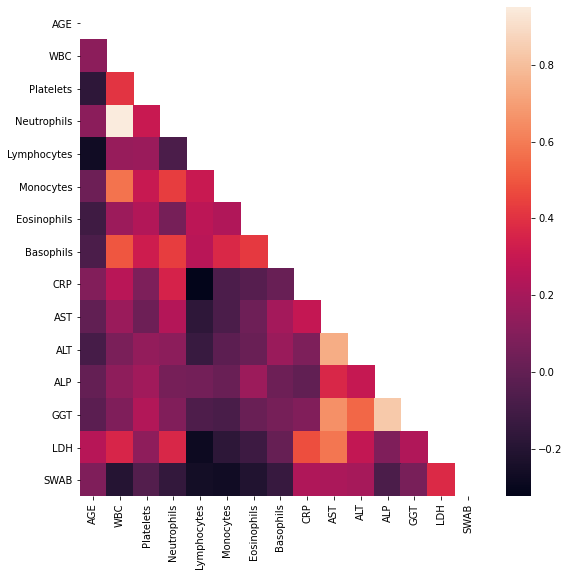

In [7]:
)corr = data[data.columns[2:]].corr('pearson')
f, ax = plt.subplots(figsize=(9, 9))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask)

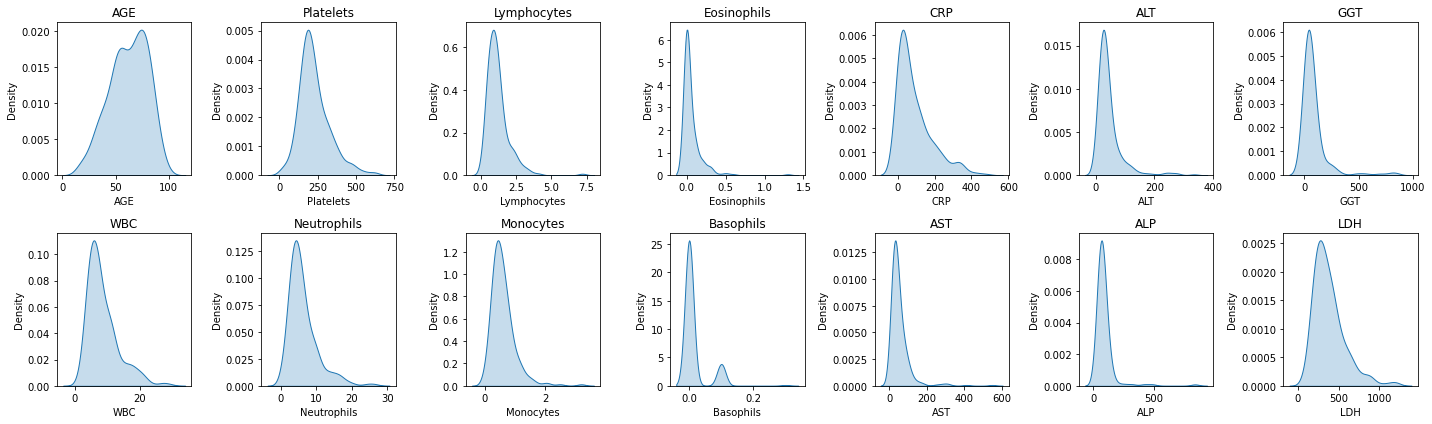

In [8]:
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(data[data.columns[x]], ax=axes[i,j], fill=True)
    axes[i,j].set_title(data.columns[x])
plt.tight_layout()

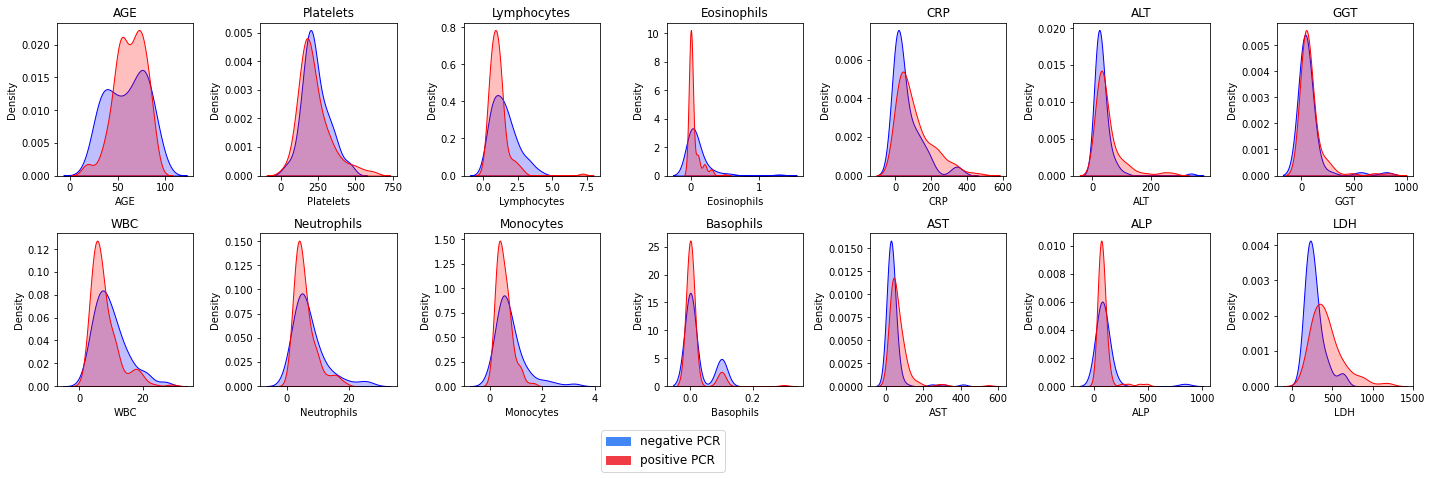

In [9]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#4287f5', label='negative PCR')
red_patch = mpatches.Patch(color='#f03c45', label='positive PCR')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    sns.kdeplot(data[data["SWAB"] == 0][data.columns[x]], ax=axes[i,j], color="blue", fill=True)
    sns.kdeplot(data[data["SWAB"] == 1][data.columns[x]], ax=axes[i,j], color="red", fill=True)
    axes[i,j].set_title(data.columns[x])
plt.tight_layout()
plt.legend(handles=[blue_patch, red_patch], loc="lower center",bbox_to_anchor=(-4.5,-0.6), fontsize="large")

In [10]:
d = data.fillna(0)

In [11]:
d.describe()

,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,0.326165,0.673835,61.333333,8.491756,224.908244,4.644803,0.884588,0.453763,0.041219,0.010753,88.934409,53.813620,42.824373,42.207885,40.204301,264.541219,0.634409
std,0.469651,0.469651,18.503354,4.891562,102.611459,4.503144,0.867361,0.441602,0.116853,0.034336,94.326241,57.587666,45.427640,75.706551,101.278293,238.530267,0.482461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,49.000000,5.100000,162.000000,0.250000,0.000000,0.000000,0.000000,0.000000,18.600000,27.000000,18.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,64.000000,7.100000,204.000000,3.900000,0.800000,0.400000,0.000000,0.000000,53.100000,36.000000,30.000000,0.000000,0.000000,254.000000,1.000000
75%,1.000000,1.000000,76.000000,10.700000,271.000000,6.500000,1.200000,0.700000,0.000000,0.000000,128.600000,60.000000,45.000000,68.000000,39.000000,404.500000,1.000000
max,1.000000,1.000000,98.000000,29.200000,620.000000,26.400000,7.200000,3.200000,1.300000,0.300000,478.000000,550.000000,335.000000,838.000000,839.000000,1195.000000,1.000000


In [13]:
print(data.isnull().any(axis=1).sum())
print(data.isnull().any(axis=1).sum() / data.shape[0])

196
0.7025089605734767
